***This project will show my dummy variable knowledge***

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model  

df=pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [3]:
dum=pd.get_dummies(df['Car Model']).astype(int)
dum

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [4]:
merged = pd.concat([df,dum],axis='columns')
merged 

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [5]:
final=merged.drop(columns=['Car Model','Mercedez Benz C class'])
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [6]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
X=final.drop(columns=['Sell Price($)'])
Y=final['Sell Price($)']
reg.fit(X,Y)
reg.predict([[46000,4,0,0]])

C:\Users\win\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36621.19511622])

***training and testing the model***

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
reg2=LinearRegression()
bmw_sales=df[0:5]
milleage=bmw_sales['Mileage']
milleage=milleage.values

age=bmw_sales['Age(yrs)']
age=age.values.reshape(-1,1)


x_train,x_test,y_train,y_test=train_test_split(age,milleage,test_size=0.2,random_state=10)

reg2.fit(x_train,y_train)
reg2.predict(x_test)

reg2.score(x_train,y_train)
age

array([[6],
       [3],
       [5],
       [2],
       [4]], dtype=int64)

<Axes: >

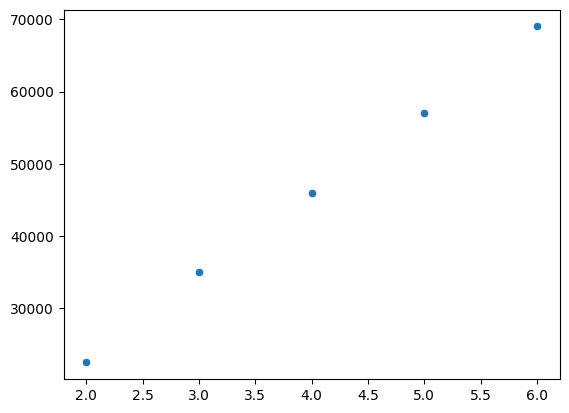

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns 

conv_age=age.flatten()
conv_millage=milleage.flatten()




sns.scatterplot(data=bmw_sales,x=conv_age,y=conv_millage)
